# PH1 Project Submission

Please fill out:
* Student name: Sergey Syrvachev
* Student pace: self paced / part time / full time : full time
* Scheduled project review date/time: December 11
* Instructor name: Mark Barbour
* Blog post URL:


#  1) Business problem

 Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they dont know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create

# 2) Input data and environment setup

## 2.1) Data sources
### Box Office Mojo databases
Database containing data scraped from Box Office Mojo website, that tracks box-office revenue in a systematic, algorithmic way. 
Source_website: https://www.boxofficemojo.com/

a) bom.movie_gross.csv
Type of Information: Revenue data
- Film name
- Studio
- Domestic gross revenue
- Foreign gross revenue
- Year of production

### IMDB databases
Databases containing data scraped from IMDB website. The largest website related to movies.
Source_website: https://www.imdb.com/

a) "imdb.name.basics" -  
Type of Information: Names of directing staff and their best known films
- PersonID
- Name
- Profession
- Well known filmID
b) "imdb.title.akas" 
Type of Information: Regions of film destribution and local film names.
- FilmID
- Region
- Film name on local language
- Original film name

c) "imdb.title.principals.csv"
Type of Information: Information about film directors and writers
- FilmID
- DirectorsID
- WritersID

d) File imdb.title.basics.csv'
Type of Information: Information about start date, runtime and genres
- FilmID
- Primary film name
- Original film name
- Start date
- Runtime
- Genres

e) File imdb.title.ratings.csv'
Type of Information: Film raiting, IMDB version
- FilmID
- Average raiting
- Number of voites

### The number databases
The Numbers is a film industry data website that tracks box office revenue in a systematic, algorithmic way
Source_website: https://www.the-numbers.com/
a) tn.movie_budgets.csv
Type of Information: Information about film production date, budget and revenue
- Film name
- Release date
- Production Budget
- Local gross revenue
- International gross revenue

### The Movie Database (TMDB)
The Movie Database (TMDB) is a community built movie and TV database
Source_website: www.themoviedb.org

a) tmdb.movies.csv
Type of Information: Information about film production date, name and raiting basd on TMDB
- Film name
- Release date
- Average raiting
- Number of voites

## 2.2) Modules
This analysis will be made using python and additional libraries for: importing data, performing data operations, visalization.
### List of modules

In [389]:
# Data import
import csv  #import of CSV files 


#Data operations
import numpy as np  #Used for basic processing effective calculations
import pandas as pd #Advanced DataFrames and Data processing
pd.options.mode.chained_assignment = None

#Visualization
import matplotlib.pyplot as plt  #Basic visualization
import seaborn as sns  #Advanced Visualization

#SQL
import sqlite3  #Performing SQL quaries
#from pandasql import sqldf

#Magic commands
%timeit

## 2.3) Data exploration

In [2]:
# 1 - All databases and identify information containing in each of them.
# 2 - Data explanation was added into 2.1 Data description. 
# 3 - All fields are # to reduce the lenght of notebook. 

# display(f"File bom.movie_gross.csv")
# display(pd.read_csv("Data/bom.movie_gross.csv").head(2))

# display(f"File imdb.name.basics.csv")
# display(pd.read_csv("Data/imdb.name.basics.csv").head(2))

# display(f"File imdb.title.akas.csv")
# display(pd.read_csv("Data/imdb.title.akas.csv").head(2))

# display(f"File imdb.title.basics.csv")
# display(pd.read_csv("Data/imdb.title.basics.csv").head(2))

# display(f"File imdb.title.crew.csv")
# display(pd.read_csv("Data/imdb.title.crew.csv").head(2))

# display(f"File imdb.title.principals.csv")
# display(pd.read_csv("Data/imdb.title.principals.csv").head(2))

# display(f"File imdb.title.ratings.csv")
# display(pd.read_csv("Data/imdb.title.ratings.csv").head(2))

# display(f"File tmdb.movies.csv")
# display(pd.read_csv("Data/tmdb.movies.csv").head(2))

# display(f"File tn.movie_budgets.csv")
# display(pd.read_csv("Data/tn.movie_budgets.csv").head(2))



# 3) Analysis

## 3.1) Basic market estimation

In the first part we look into the box offices to see the box offices during the last 10 years. 
This data can be exctracted from 2 datasets, bom.movie_gross and tn.movie_budgets

In [3]:
print(f"\nStatistics for Box Office Mojo database (file bom.movie_gross.csv):\n")
df31 =  pd.read_csv("Data/bom.movie_gross.csv")
print(f"This data base consist of observations for", str(len(df31.groupby("year").count())), "years")
print(f"\nThe number of records: -",len(df31["title"]))
print(f"\nData base structure:")
df31.info()

print(f"Film year record looks like: <", str(df31["year"][0]) , ">, type", type(df31["year"][0]))


#df31["year"].value()

print(f"\n\nStatistics for The number databases (tn.movie_budgets.csv):\n")
df32 =  pd.read_csv("Data/tn.movie_budgets.csv")
print(f"This data base consist of observations for", str(len(df32.groupby("release_date").count())), "years")
print(f"Film year record looks like: <", str(df32["release_date"][0]) , ">, type", type(df32["release_date"][0]) )
print(f"\nThe number of records: -",len(df32["movie"]))
print(f"\nData base structure:")
df32.info()




Statistics for Box Office Mojo database (file bom.movie_gross.csv):

This data base consist of observations for 9 years

The number of records: - 3387

Data base structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
Film year record looks like: < 2010 >, type <class 'numpy.int64'>


Statistics for The number databases (tn.movie_budgets.csv):

This data base consist of observations for 2418 years
Film year record looks like: < Dec 18, 2009 >, type <class 'str'>

The number of records: - 5782

Data base structure:
<class 'pandas.core.frame.DataFrame'>
R

In [4]:
# "The number" databases release years normalization
df32["release_year"] = df32["release_date"].map(lambda x: int(x[-4:]))
df32["release_year"].describe()

TheNumber = df32[(df32["release_year"] > 2011) & (df32["release_year"] < 2019)]
print(f" Box Office Mojo database has", len(df31["title"]) ,"records between 2012-2018 years")
print(f" The Numbers database has {df32.release_year[(df32.release_year > 2011) & (df32.release_year < 2019)].shape[0]} records between 2012-2018 years")






#df31["Total_gross"] = df31["domestic_gross"] + df31["foreign_gross"].astype(np.int64)

 Box Office Mojo database has 3387 records between 2012-2018 years
 The Numbers database has 1596 records between 2012-2018 years


In [5]:
# Investigation of NA values in Box Office Mojo database
# 1) Sum total local gross box office and worldwide gross box office (with droping out NA values of missing international box office)
# One of the reasons why foreign box office can be missing, because film wasn't displayed outside of country
print(f"The Number of missing values in foreign box office: {df31.foreign_gross.isna().sum()}")
df31_foreign_std = df31[df31["foreign_gross"].notna()] #Drop NA rows foreign_gross to calculate the international revenue for each year
print(f"The Number of missing values in foreign box office after drop NA rows: {df31_foreign_std.foreign_gross.isna().sum()}") 
print(f"Type of value foreign gross office {type(df31_foreign_std.foreign_gross[0])}")
df31_foreign_std["foreign_gross_int"]= df31_foreign_std["foreign_gross"].map(lambda x: float(x.replace(",","")))
print(f"Type of value foreign gross office after type modification{type(df31_foreign_std.foreign_gross_int[0])}")


# 2) Calculate of overall box office for films with the only domestic box office records(without international)
df31_local_std = df31[df31["domestic_gross"].notna()] #Drop NA rows foreign_gross to calculate the local revenue for each year
Only_domestic=df31_local_std[df31_local_std["foreign_gross"].isna()].groupby("year").sum().sum()

# 3) Calculate proportion between films with only domestic revenue and domestic part of international movies

Only_local_proportion = Only_domestic/df31_foreign_std.groupby("year")["domestic_gross"].sum().sum()
print(f"""We calculated the proportion between 2 groups of films:
1) Films with only domestic box office
2) Films with domestic and international box office
Proportion is {Only_local_proportion} that is less than 5%
While the number of films is {df31_local_std[df31_local_std["foreign_gross"].isna()].groupby("year").count().sum()[0]}
""" )





The Number of missing values in foreign box office: 1350
The Number of missing values in foreign box office after drop NA rows: 0
Type of value foreign gross office <class 'str'>
Type of value foreign gross office after type modification<class 'numpy.float64'>
We calculated the proportion between 2 groups of films:
1) Films with only domestic box office
2) Films with domestic and international box office
Proportion is domestic_gross    0.023189
dtype: float64 that is less than 5%
While the number of films is 1350



From Box Office Mojo database we can drop off 1350 movies (from 3359) that has domestic box office but don't have international because:
1) While they represent the big proportion of movies, the domestic box office of these 1350 movies correspond to 2% of domestic box office of other films that have international box office

Probable reason: These were small local films that were not shown internatilonally and they are not our focus group. 

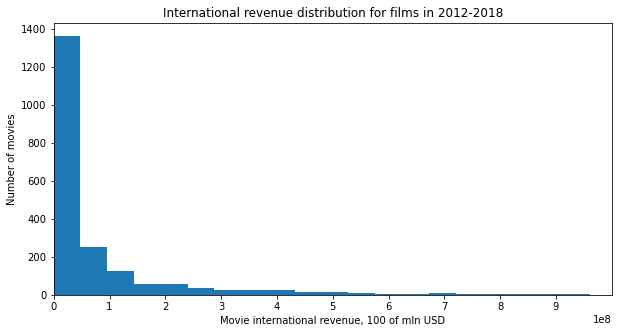

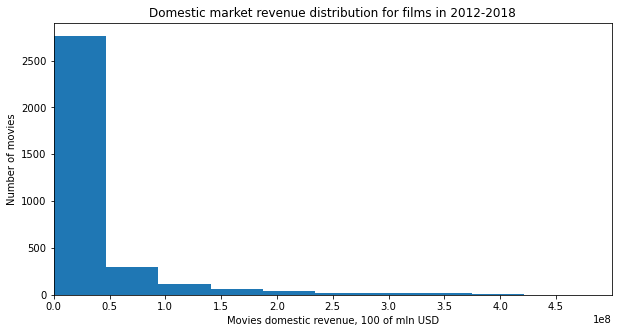

74872810.15046637
137410600.84150565
-199948391.5325449


In [6]:


# Let's see the histogram of films interntaional revenue distribution
fig, ax = plt.subplots(figsize = (10,5) )
plt.hist(df31_foreign_std["foreign_gross_int"].values, bins=20)
ax.set_title("International revenue distribution for films in 2012-2018")
ax.set_xlabel("Movie international revenue, 100 of mln USD")
ax.set_ylabel("Number of movies")
ax.set_xticks(range(0,1000000000,100000000))
ax.set_xlim(0, 1000000000)

plt.show()


# Let's see the histogram of films local revenue distribution
fig, ax = plt.subplots(figsize = (10,5) )
plt.hist(df31_local_std["domestic_gross"].values, bins=20)
ax.set_title("Domestic market revenue distribution for films in 2012-2018")
ax.set_xlabel("Movies domestic revenue, 100 of mln USD")
ax.set_ylabel("Number of movies")
ax.set_xticks(range(0,500000000,50000000))
ax.set_xlim(0, 500000000)

plt.show()

print(df31_foreign_std["foreign_gross_int"].mean())
print(df31_foreign_std["foreign_gross_int"].std())
threshold = df31_foreign_std["foreign_gross_int"].mean() - 2*df31_foreign_std["foreign_gross_int"].std()
print(threshold)

We can see that the majority of 

Mean annual growth in worldwide box office was 2.01 %


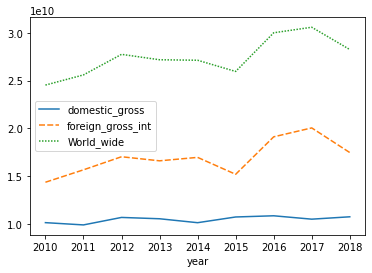

In [7]:
Total_revenue = pd.DataFrame()

Total_revenue["domestic_gross"] = df31_foreign_std.groupby("year")["domestic_gross"].sum()
Total_revenue["foreign_gross_int"] = df31_foreign_std.groupby("year")["foreign_gross_int"].sum()
Total_revenue["World_wide"] = Total_revenue["domestic_gross"] + Total_revenue["foreign_gross_int"]

Average_growth = round(Total_revenue["World_wide"].pct_change()[1:9].mean(), 4)*100

sns.lineplot(data = Total_revenue)
print(f"Mean annual growth in worldwide box office was {Average_growth} %")



#### Filming industry is a stable growing market, with annual growth of worldwide box office 2 %

## 3.2) Is there correlation between production cost and box office

We can take information about box office and production cost from The number database

In [15]:
DF_OvsP = df32[(df32.release_year > 2011) & (df32.release_year < 2019)]

In [29]:
DF_OvsP.info()

DF_OvsP["production_budget_conv"] = DF_OvsP["production_budget"].map(lambda x: x.strip("$").replace(",","")).astype(np.int64)
DF_OvsP["worldwide_gross_conv"] = DF_OvsP["worldwide_gross"].map(lambda x: x.strip("$").replace(",","")).astype(np.int64)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 3 to 5780
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1596 non-null   int64 
 1   release_date            1596 non-null   object
 2   movie                   1596 non-null   object
 3   production_budget       1596 non-null   object
 4   domestic_gross          1596 non-null   object
 5   worldwide_gross         1596 non-null   object
 6   release_year            1596 non-null   int64 
 7   production_budget_conv  1596 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 112.2+ KB


In [30]:
DF_OvsP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 3 to 5780
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      1596 non-null   int64 
 1   release_date            1596 non-null   object
 2   movie                   1596 non-null   object
 3   production_budget       1596 non-null   object
 4   domestic_gross          1596 non-null   object
 5   worldwide_gross         1596 non-null   object
 6   release_year            1596 non-null   int64 
 7   production_budget_conv  1596 non-null   int64 
 8   worldwide_gross_conv    1596 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 124.7+ KB


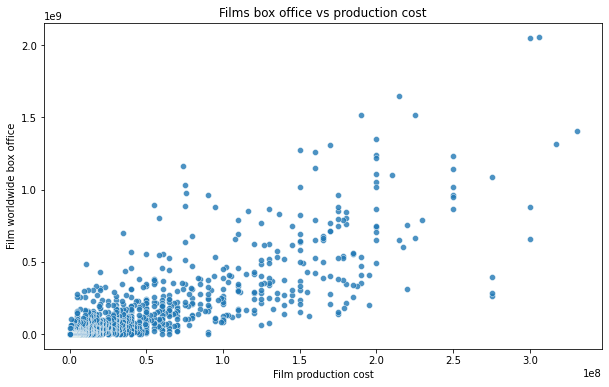

In [98]:
fig, ax = plt.subplots(1,1,figsize = (10, 6))
sns.scatterplot(x = DF_OvsP["production_budget_conv"], y = DF_OvsP["worldwide_gross_conv"], alpha = 0.8)
ax.set_xlabel("Film production cost")
ax.set_ylabel("Film worldwide box office")
ax.set_title("Films box office vs production cost")
plt.show()

In [47]:
DF_OvsP.corrwith(DF_OvsP["production_budget_conv"])

correlation=DF_OvsP.corrwith(DF_OvsP["production_budget_conv"])[3]
print(f"Production budget has strong correlation with box office, correlation coefficient is {round(correlation, 4)}")




Production budget has strong correlation with box office, correlation coefficient is 0.8124


Lets check film budget based on 4 cathegories and check correaltion within them: 
- Indy film  < 500 000$

- Low budget 500 000 - 9 999 999$

- Medium budget 10 000 000 - 99 999 999$

- Blockbuster > 100 000 000$

In [59]:
# Budgeting division of films
def budget(x):
    if x < 500000:
        return "Indy film"
    elif x < 9999999:
        return "Low budget film"
    elif x < 99999999:
        return "Medium budget film"
    else:
        return "Blockbuster"

DF_OvsP["film_type"] = DF_OvsP["production_budget_conv"].map(budget)
DF_OvsP["film_type"].value_counts()



Medium budget film    798
Low budget film       512
Blockbuster           185
Indy film             101
Name: film_type, dtype: int64

Text(0.5, 1.0, 'Films box office vs production cost for different types of films')

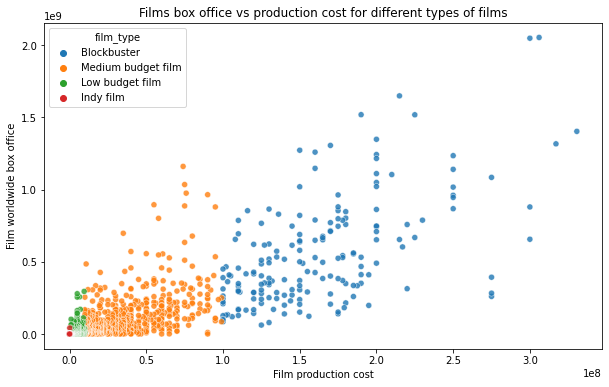

In [102]:
fig, ax = plt.subplots(1 ,1 , figsize =(10,6))
sns.scatterplot(x = DF_OvsP["production_budget_conv"], y = DF_OvsP["worldwide_gross_conv"], hue = DF_OvsP["film_type"], alpha = 0.8)
ax.set_xlabel("Film production cost")
ax.set_ylabel("Film worldwide box office")
ax.set_xticks(range(0, max(DF_OvsP["production_budget_conv"]), 50000000))
ax.set_title("Films box office vs production cost for different types of films")

In [84]:
#Correlation in different film groups claculations:

#Define new datasets
Indy_films = DF_OvsP[DF_OvsP["film_type"] == "Indy film"]
Low_budget = DF_OvsP[DF_OvsP["film_type"] == "Low budget film"]
Medium_budget = DF_OvsP[DF_OvsP["film_type"] == "Medium budget film"]
Blockbuster = DF_OvsP[DF_OvsP["film_type"] == "Blockbuster"]

#correlation calculations
correlation_indy=Indy_films.corrwith(Indy_films["production_budget_conv"])
correlation_low=Low_budget.corrwith(Low_budget["production_budget_conv"])
correlation_medium = Medium_budget.corrwith(Medium_budget["production_budget_conv"])
correlation_blockbuster = Blockbuster.corrwith(Blockbuster["production_budget_conv"])

# Output statement
print(f"""
Correlation coefficient between production cost and worldwide box office in different types of movies:
1) Indy films {round(correlation_indy[3], 5)}
2) Low budget films {round(correlation_low[3], 5)}
3) Medium budget films {round(correlation_medium[3], 5)}
4) Blockbuster films {round(correlation_blockbuster[3], 5)}

General correlation {round(correlation[3], 5)}
""")




Correlation coefficient between production cost and worldwide box office in different types of movies:
1) Indy films -0.03896
2) Low budget films 0.28105
3) Medium budget films 0.51508
4) Blockbuster films 0.60276

General correlation 0.81241



#### As we can see from the scatterplot, there is a strong correlation between production cost and film box office. From Further investigation we can see that correlation strenght depends on production cost and increases with higher budgets. Starting with almost non correlation for Indy films (budget < 500 000 USD), and ending strong correlation 0.60276 for Blockbuster films(budget > 100 000 000 USD)

Table of correlation: 

1) Indy films -0.03896

2) Low budget films 0.28105

3) Medium budget films 0.51508

4) Blockbuster films 0.60276


# Film distrubution within studios

In [104]:
df31_foreign_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2037 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2037 non-null   object 
 1   studio             2033 non-null   object 
 2   domestic_gross     2009 non-null   float64
 3   foreign_gross      2037 non-null   object 
 4   year               2037 non-null   int64  
 5   foreign_gross_int  2037 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 175.9+ KB


In [149]:
studios = df31_foreign_std.dropna()
studios.info()
studios["worldwide"] = studios["domestic_gross"] + studios["foreign_gross_int"]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              2007 non-null   object 
 1   studio             2007 non-null   object 
 2   domestic_gross     2007 non-null   float64
 3   foreign_gross      2007 non-null   object 
 4   year               2007 non-null   int64  
 5   foreign_gross_int  2007 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 109.8+ KB


In [390]:
studios.value_counts("studio").head(10)

studio
Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
dtype: int64

In [172]:
Uni_films = studios[studios["studio"] == "Uni."]
fox_films = studios[studios["studio"] == "Fox"]
WB_films = studios[studios["studio"] == "WB"]
Sony_films = studios[studios["studio"] == "Sony"]
BV_films = studios[studios["studio"] == "BV"]
Par_films = studios[studios["studio"] == "Par."]

list_studio = [Uni_films, fox_films, WB_films, Sony_films, BV_films, Par_films]
list_studio_names = ["Universal films", "Fox studio", "Warner Bros.", "Sony pictures", "Disney Studio", "Paramount pictures"]
list(range(0,5))

[0, 1, 2, 3, 4]

In [188]:
fox_films["worldwide"].tail()

3162    66300000.0
3173    50500000.0
3180    41100000.0
3186    34900000.0
3189    31800000.0
Name: worldwide, dtype: float64


Studio Universal films has a 25th percentile box office of 74.0mln USD
Studio Universal films has the mean box office of 130.0mln USD
Studio Universal films has a 75th percentile box office of 272.0mln USD

Studio Fox studio has a 25th percentile box office of 71.0mln USD
Studio Fox studio has the mean box office of 164.0mln USD
Studio Fox studio has a 75th percentile box office of 352.0mln USD

Studio Warner Bros. has a 25th percentile box office of 58.0mln USD
Studio Warner Bros. has the mean box office of 128.0mln USD
Studio Warner Bros. has a 75th percentile box office of 310.0mln USD

Studio Sony pictures has a 25th percentile box office of 58.0mln USD
Studio Sony pictures has the mean box office of 150.0mln USD
Studio Sony pictures has a 75th percentile box office of 247.0mln USD

Studio Disney Studio has a 25th percentile box office of 81.0mln USD
Studio Disney Studio has the mean box office of 228.0mln USD
Studio Disney Studio has a 75th percentile box office of 688.0mln USD



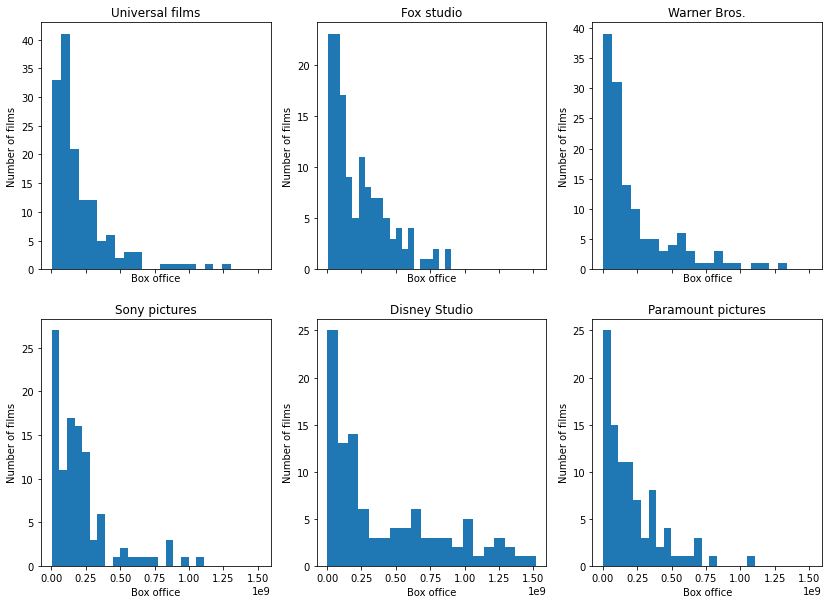

In [245]:
fig, ax = plt.subplots(2, 3, figsize = (14,10), squeeze = True, sharex=True)

for num in list(range(0,6)):
    row = num//3
    column = num%3
    ax[row][column].hist(list_studio[num]["worldwide"].values, bins=20)
    ax[row][column].set_title(list_studio_names[num])
    ax[row][column].set_xlabel("Box office , 100 mln USD")
    ax[row][column].set_ylabel("Number of films")
    
percentile_low = 25
percentile_high = 75
for num in list(range(0,6)):
    perc_low = np.percentile(list_studio[num]["worldwide"].values, percentile_low)
    mean = np.percentile(list_studio[num]["worldwide"].values, 50)
    perc_high = np.percentile(list_studio[num]["worldwide"].values, percentile_high)
    print("")
    print(f"Studio {list_studio_names[num]} has a {percentile_low}th percentile box office of {round(perc_low/1000000,0)}mln USD")
    print(f"Studio {list_studio_names[num]} has the mean box office of {round(mean/1000000,0)}mln USD")
    print(f"Studio {list_studio_names[num]} has a {percentile_high}th percentile box office of {round(perc_high/1000000,0)}mln USD")
    




In [193]:
    
list_studio[1]["worldwide"][list_studio[1]["worldwide"] < 66300000].values



array([44100000., 33200000., 27300000., 39700000., 34900000., 30399999.,
       18700000.,  7444000., 54800000., 50389000.,  6000600., 62700000.,
       36900000., 16900000., 62900000., 34300000., 14400000., 46200000.,
       29900000., 14300000.,  8800000.,  3933000., 62800000., 60900000.,
       40100000., 26600000., 50500000., 41100000., 34900000., 31800000.])

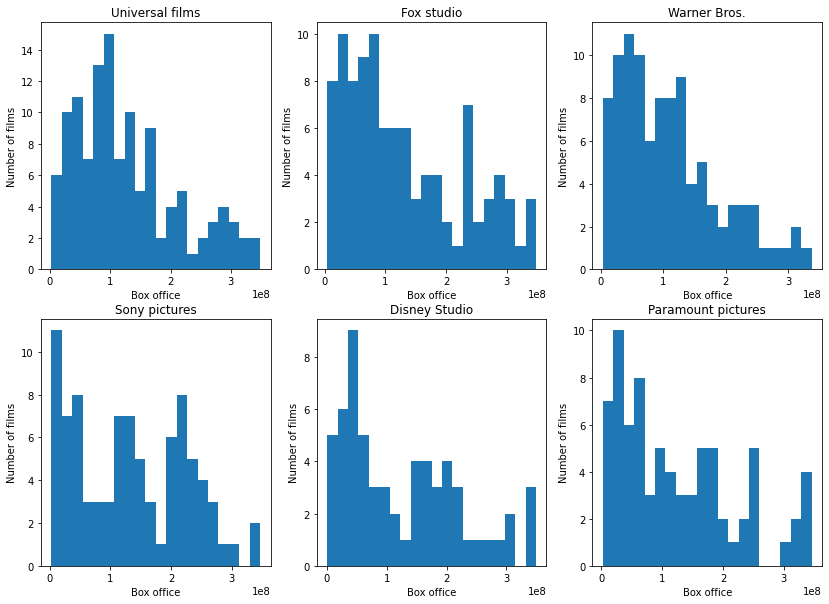

In [237]:
fig, ax = plt.subplots(2, 3, figsize = (14,10), squeeze = True)
for num in list(range(0,6)):
    row = num//3
    column = num%3
    ax[row][column].hist(list_studio[num]["worldwide"][list_studio[num]["worldwide"] < 350000000].values, bins=20)
    ax[row][column].set_title(list_studio_names[num])
    ax[row][column].set_xlabel("Box office, 100 mln USD")
    ax[row][column].set_ylabel("Number of films")
    

### Popular genres 


In [246]:
# display(f"File imdb.title.basics.csv")
# display(pd.read_csv("Data/imdb.title.basics.csv").head(2))

#display(f"File imdb.title.crew.csv")
# display(pd.read_csv("Data/imdb.title.crew.csv").head(2))

# display(f"File imdb.title.principals.csv")
# display(pd.read_csv("Data/imdb.title.principals.csv").head(2))

# display(f"File imdb.title.ratings.csv")
# display(pd.read_csv("Data/imdb.title.ratings.csv").head(2))

In [261]:
ganres_df_initial = pd.read_csv("Data/imdb.title.basics.csv")
ganres_df_initial.isna().sum()
ganres_df_initial.info()



#ganres_df["genres_split"] =ganres_df["genres"].map(lambda x : x.split(",")) 
#ganres_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [263]:
# Check the data during different time
ganres_df_initial["start_year"].value_counts()

# Trim the years to work with dataset from 2010 to 2018. 
ganres_df_with_na= ganres_df_initial[(ganres_df_initial["start_year"] > 2009) & (ganres_df_initial["start_year"] < 2019)]
ganres_df_with_na["start_year"].value_counts()


2017    17504
2016    17272
2018    16849
2015    16243
2014    15589
2013    14709
2012    13787
2011    12900
2010    11849
Name: start_year, dtype: int64

In [265]:
#Check how many NON type left
ganres_df_with_na.info()
#Missing ganres info is less than 5%, drop this info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 136702 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           136702 non-null  object 
 1   primary_title    136702 non-null  object 
 2   original_title   136683 non-null  object 
 3   start_year       136702 non-null  int64  
 4   runtime_minutes  109815 non-null  float64
 5   genres           131664 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.3+ MB


In [277]:
ganres_df = ganres_df_with_na[ganres_df_with_na["genres"].notna()]
ganres_df.info()
print(type(ganres_df["genres"][0]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131664 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           131664 non-null  object 
 1   primary_title    131664 non-null  object 
 2   original_title   131662 non-null  object 
 3   start_year       131664 non-null  int64  
 4   runtime_minutes  107712 non-null  float64
 5   genres           131664 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.0+ MB
<class 'str'>


In [279]:
#Transform ganres from string to list for further processing
ganres_df["genres_split"] = ganres_df["genres"].map(lambda x : x.split(",")) 
ganres_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_split
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,[Comedy]
...,...,...,...,...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.0,"Biography,Documentary,History","[Biography, Documentary, History]"
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,[Documentary]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy]


In [369]:
#lets find unique ganre types
ganres=ganres_df["genres_split"].values[0:500]
ganres
ganre_types =[]
for film in ganres:
    for i in film:
        if i not in ganre_types:
            ganre_types.append(i)

ganre_types

['Action',
 'Crime',
 'Drama',
 'Comedy',
 'Fantasy',
 'Horror',
 'Thriller',
 'Adventure',
 'Animation',
 'Documentary',
 'History',
 'Biography',
 'Mystery',
 'Sci-Fi',
 'Romance',
 'Family',
 'War',
 'Music',
 'Sport',
 'Western',
 'Musical']

In [391]:
#Mark each film with ganres
for i in ganre_types:
    ganres_df_divided[i] = 0

for i in ganre_types:
     for k in range(len(ganres_df_divided["genres_split"])):
        if i in ganres_df_divided["genres_split"].values[k]:
            ganres_df_divided[i].values[k] = 1
            
ganres_df_divided


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,genres_split,Action,Crime,Drama,...,Mystery,Sci-Fi,Romance,Family,War,Music,Sport,Western,Musical,0
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama","[Action, Crime, Drama]",1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,[Drama],0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama","[Comedy, Drama]",0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy","[Comedy, Drama, Fantasy]",0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,[Comedy],0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146133,tt9916132,The Mystery of a Buryat Lama,The Mystery of a Buryat Lama,2018,94.0,"Biography,Documentary,History","[Biography, Documentary, History]",0,0,0,...,0,0,0,0,0,0,0,0,0,1
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary,[Documentary],0,0,0,...,0,0,0,0,0,0,0,0,0,1
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,[Documentary],0,0,0,...,0,0,0,0,0,0,0,0,0,1
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,[Comedy],0,0,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:title={'center':'The average number of films in different ganres'}, xlabel='Ganres', ylabel='Average Number of films per year'>

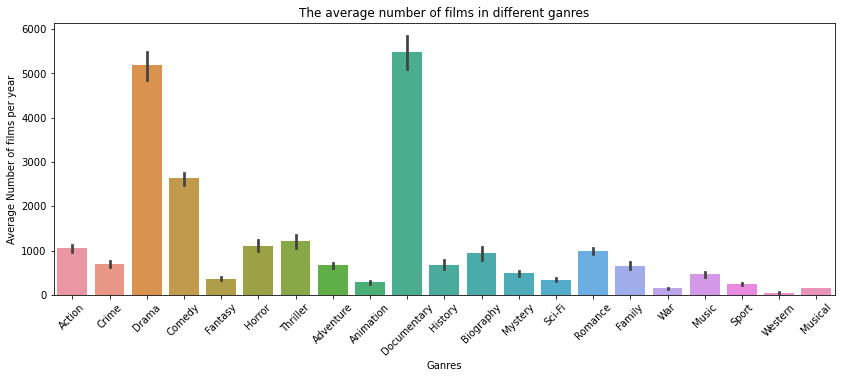

In [468]:
#Find values
ganres_df_divided.groupby("start_year").sum()
ganres_df_divided

#Drop unused numeric columns 
ganres_end = ganres_df_divided.drop(["runtime_minutes", 0], axis=1,  )
fig, ax = plt.subplots(figsize= (14, 5))
ax.set_xlabel("Ganres")
ax.set_ylabel("Average Number of films per year")
ax.set_title("The average number of films in different ganres")
plt.xticks(rotation=45)
sns.barplot(data = ganres_end.groupby("start_year").sum())


In [451]:
ganres_end.corrwith(ganres_end["Documentary"])

start_year    -0.031119
Action        -0.187402
Crime         -0.130318
Drama         -0.426972
Comedy        -0.308025
Fantasy       -0.110313
Horror        -0.214891
Thriller      -0.229152
Adventure     -0.033764
Animation     -0.074587
Documentary    1.000000
History        0.155748
Biography      0.221674
Mystery       -0.124437
Sci-Fi        -0.113091
Romance       -0.198111
Family        -0.020107
War            0.005159
Music          0.076683
Sport          0.049906
Western       -0.027026
Musical       -0.044040
dtype: float64

<AxesSubplot:title={'center':'Films ganre distribution over the years (heatmap)'}, ylabel='start_year'>

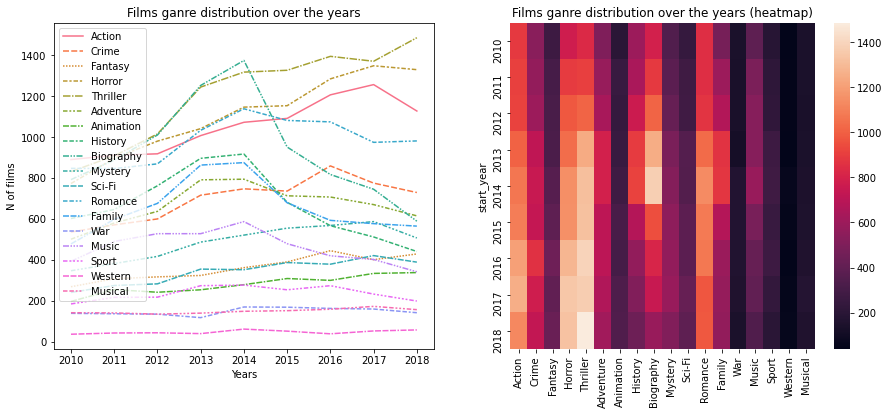

In [466]:
ganres_end_excl = ganres_end.drop(["Drama", "Documentary", "Comedy"], axis=1 )

fig, ax = plt.subplots(1, 2, figsize= (15, 6))
ax0=ax[0]
ax1=ax[1]
ax0.set_xlabel("Years")
ax0.set_ylabel("N of films")
#ax0.legend(bbox_to_anchor = (1,1), loc = "upper left")
ax1.set_xlabel("Ganres")
ax1.set_ylabel("Years")
ax0.set_title("Films ganre distribution over the years")
ax1.set_title("Films ganre distribution over the years (heatmap)")



sns.lineplot(data = ganres_end_excl.groupby("start_year").sum(), ax = ax0)
sns.heatmap(data = ganres_end_excl.groupby("start_year").sum(), ax = ax1)




,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


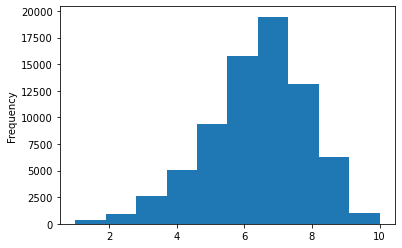

In [484]:
#add raiting column
# display(f"File imdb.title.ratings.csv")
raiting_df = pd.read_csv("Data/imdb.title.ratings.csv")
raiting_df
raiting_df.describe()

# Hist to determine shape of raiting chart
raiting_df["averagerating"].plot(kind="hist")

raiting_df["numvotes"].median()
raiting_df.describe()



